In [6]:
import os
import numpy as np
import pandas as pd
from torch import torch, nn, optim
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader


In [2]:
def read_data_from_csv(path):
    """Load datasets from CSV files.
    Args:
        path (str): Path to the CSV file.
    Returns:
        X (np.ndarray): Features of samples.
        y (np.ndarray): Labels of samples, only provided in the public datasets.
    """
    assert os.path.exists(path), f'File not found: {path}!'
    assert os.path.splitext(path)[
        -1] == '.csv', f'Unsupported file type {os.path.splitext(path)[-1]}!'

    data = pd.read_csv(path)
    column_list = data.columns.values.tolist()

    if 'Label' in column_list:
        # for the public dataset, label column is provided.
        column_list.remove('Label')
        X = data[column_list].values
        y = data['Label'].astype('int').values
        return X, y
    else:
        # for the private dataset, label column is not provided.
        X = data[column_list].values
        return X

def renameCols(df: pd.DataFrame):
    df_new = df.rename(
        columns={
            0: 'Credit', 
            1: 'Gender',
            2: 'Edu',
            3: 'Marital',
            4: 'Age',
            5: 'RePay_Sep',
            6: 'RePay_Aug',
            7: 'RePay_Jul',
            8: 'RePay_Jun',
            9: 'RePay_May',
            10: 'RePay_Apr',
            11: 'Bill_Sep',
            12: 'Bill_Aug',
            13: 'Bill_Jul',
            14: 'Bill_Jun',
            15: 'Bill_May',
            16: 'Bill_Apr',
            17: 'Paid_Sep',
            18: 'Paid_Aug',
            19: 'Paid_Jul',
            20: 'Paid_Jun',
            21: 'Paid_May',
            22: 'Paid_Apr'
        }
    ) 
    return df_new

def handleCateg(df: pd.DataFrame):
    # binary label / category: 2
    # categories: 3, 4
    # rating categories: 6-11
    df_new = df
    # df['Class'] = df['Class'].map({'Individual':'Individual', 'Group':'Group'}).fillna('Other')
    df_isMale = df_new['Gender'].map({1: True, 2: False}).fillna(False)
    df_new['Edu'] = df_new['Edu'].map({1:'graduateSc', 2:'university', 3:'highSc'}).fillna('others')
    df_new['Marital'] = df_new['Marital'].map({1:'married', 2:'single'}).fillna('others')
    df_new['Gender'] = df_isMale

    return df_new

def oneHotEncoding(df: pd.DataFrame):
    df_ohe = pd.get_dummies(df)
    df_ohe = df_ohe[[
        'Credit', 'Gender', 
	    'Edu_graduateSc', 'Edu_highSc', 'Edu_university', 'Edu_others',
	    'Marital_married', 'Marital_single', 'Marital_others',
	    'Age',
        'RePay_Sep', 'RePay_Aug', 'RePay_Jul', 'RePay_Jun', 'RePay_May', 'RePay_Apr',
        'Bill_Sep', 'Bill_Aug', 'Bill_Jul', 'Bill_Jun', 'Bill_May', 'Bill_Apr',
        'Paid_Sep', 'Paid_Aug', 'Paid_Jul', 'Paid_Jun', 'Paid_May', 'Paid_Apr'
    ]]

    return df_ohe

In [3]:
X_public, y_public = read_data_from_csv('assignment_6_public.csv')
print('Shape of X_public:', X_public.shape)  # n_sample, m_feature (20000, 23)
print('Shape of y_public:', y_public.shape)  # n_sample (20000,)

X_private = read_data_from_csv('assignment_6_private.csv')
print('Shape of X_private:', X_private.shape)  # k_sample, m_feature (5000, 23)

# rename columns, categorize and one-hot encoding
preprocess_x = oneHotEncoding(handleCateg(renameCols(pd.DataFrame(X_public))))

Shape of X_public: (20000, 23)
Shape of y_public: (20000,)
Shape of X_private: (5000, 23)


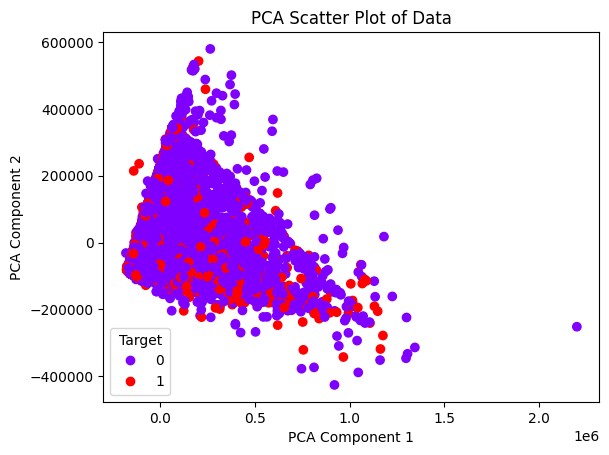

In [4]:
# Create a PCA object with 2 components
pca_2 = PCA(n_components=2)

# Fit the PCA model to the data
pca_2.fit(preprocess_x)

# Transform the data into the new 2D space
X_pca = pca_2.transform(preprocess_x)

# Plot the scatter graph
fig, ax = plt.subplots()
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c = y_public, cmap='rainbow')

# Add a legend to the plot
legend = ax.legend(*scatter.legend_elements(), loc="lower left", title="Target")

ax.set_title("PCA Scatter Plot of Data")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")

plt.show()

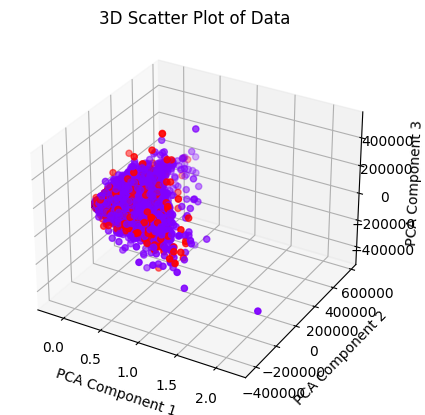

In [5]:
# Create a PCA object with 3 components
pca_3 = PCA(n_components=3)

pca_3.fit(preprocess_x)

# Transform the data into the new 3D space
X_pca = pca_3.transform(preprocess_x)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c = y_public, cmap='rainbow')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D Scatter Plot of Data')

plt.show()

Normalize

In [7]:
scaler = MinMaxScaler()
normalized_x = pd.DataFrame(scaler.fit_transform(pd.DataFrame(preprocess_x)))

In [8]:
normalized_x

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.010101,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.051724,...,0.086166,0.085777,0.098189,0.275007,0.001980,0.000000,0.000000,0.002602,0.002345,0.001228
1,0.121212,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.051724,...,0.067148,0.069223,0.080449,0.260824,0.000000,0.000033,0.001139,0.000000,0.000000,0.000000
2,0.111111,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.103448,...,0.108651,0.106501,0.117288,0.288241,0.004782,0.001480,0.001541,0.002390,0.002879,0.002302
3,0.292929,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.517241,...,0.073917,0.072160,0.092423,0.265044,0.039315,0.005117,0.004334,0.022468,0.012438,0.018912
4,0.121212,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.379310,...,0.208262,0.169262,0.177892,0.336092,0.013345,0.004515,0.004914,0.007211,0.008351,0.007606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.161616,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.241379,...,0.195962,0.164890,0.175952,0.337541,0.009901,0.004075,0.011160,0.009454,0.011723,0.009458
19996,0.060606,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.172414,...,0.069721,0.070621,0.083028,0.262823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19997,0.272727,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.534483,...,0.068118,0.068113,0.080648,0.260979,0.000000,0.000758,0.000000,0.000000,0.000000,0.000000
19998,0.010101,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.034483,...,0.088653,0.088139,0.100143,0.276207,0.004554,0.000000,0.000000,0.001490,0.001308,0.000375


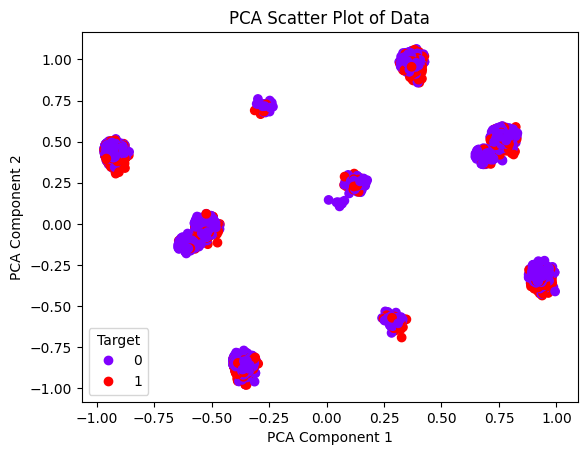

In [9]:
# Create a PCA object with 2 components
pca_2 = PCA(n_components=2)

# Fit the PCA model to the data
pca_2.fit(normalized_x)

# Transform the data into the new 2D space
X_pca = pca_2.transform(normalized_x)

# Plot the scatter graph
fig, ax = plt.subplots()
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c = y_public, cmap='rainbow')

# Add a legend to the plot
legend = ax.legend(*scatter.legend_elements(), loc="lower left", title="Target")

ax.set_title("PCA Scatter Plot of Data")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")

plt.show()

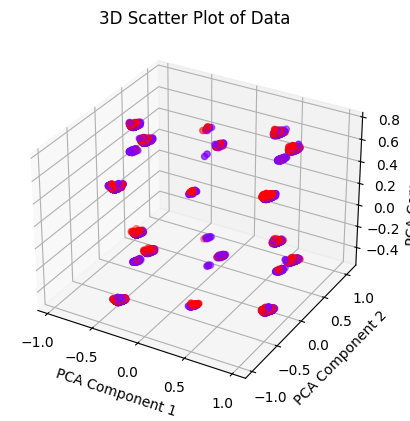

In [10]:
# Create a PCA object with 3 components
pca_3 = PCA(n_components=3)

pca_3.fit(normalized_x)

# Transform the data into the new 3D space
X_pca = pca_3.transform(normalized_x)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c = y_public, cmap='rainbow')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D Scatter Plot of Data')

plt.show()